In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pygal
from IPython.display import SVG, display
import pandas as pd
import numpy as np

mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv('user_ad.csv')
data = data.iloc[:,1:]
data.head()

,userid,性别,年龄层级,消费层级,购物层级,是否大学生,城市级别,time_stamp,ad_id,nonclk,clk,cate_id,campaign_id,customer,brand,price,price_range,price_labels
0,421833,2,3,2.0,3,0,4.0,1646208713,164434,1,0,6143,123031,172647,128474.0,1980.0,"(1600.0, 3200.0]",4
1,421833,2,3,2.0,3,0,4.0,1646461817,164434,1,0,6143,123031,172647,128474.0,1980.0,"(1600.0, 3200.0]",4
2,113020,2,4,NaN,3,0,2.0,1646202617,164434,1,0,6143,123031,172647,128474.0,1980.0,"(1600.0, 3200.0]",4
3,61260,2,2,NaN,3,0,2.0,1646291263,164434,1,0,6143,123031,172647,128474.0,1980.0,"(1600.0, 3200.0]",4
4,61260,2,2,NaN,3,0,2.0,1646560274,164434,1,0,6143,123031,172647,128474.0,1980.0,"(1600.0, 3200.0]",4


## 价格区间-点击率图表

In [3]:
df_clk = data.groupby(by=['price_labels','price_range'], as_index=False)[['nonclk','clk']].sum()
df_clk['total'] = df_clk['nonclk'] + df_clk['clk']
df_clk['clk_ratio'] = df_clk['clk']/df_clk['total']
df_clk

,price_labels,price_range,nonclk,clk,total,clk_ratio
0,0,"(100.0, 200.0]",172068,8241,180309,0.045705
1,1,"(200.0, 300.0]",96922,4956,101878,0.048646
2,2,"(300.0, 800.0]",149610,7111,156721,0.045374
3,3,"(800.0, 1600.0]",52646,2429,55075,0.044103
4,4,"(1600.0, 3200.0]",34217,1504,35721,0.042104
5,5,"(3200.0, 6400.0]",25151,1091,26242,0.041575
6,6,"(6400.0, 12800.0]",13885,639,14524,0.043996
7,7,"(12800.0, 100000000.0]",5886,316,6202,0.050951


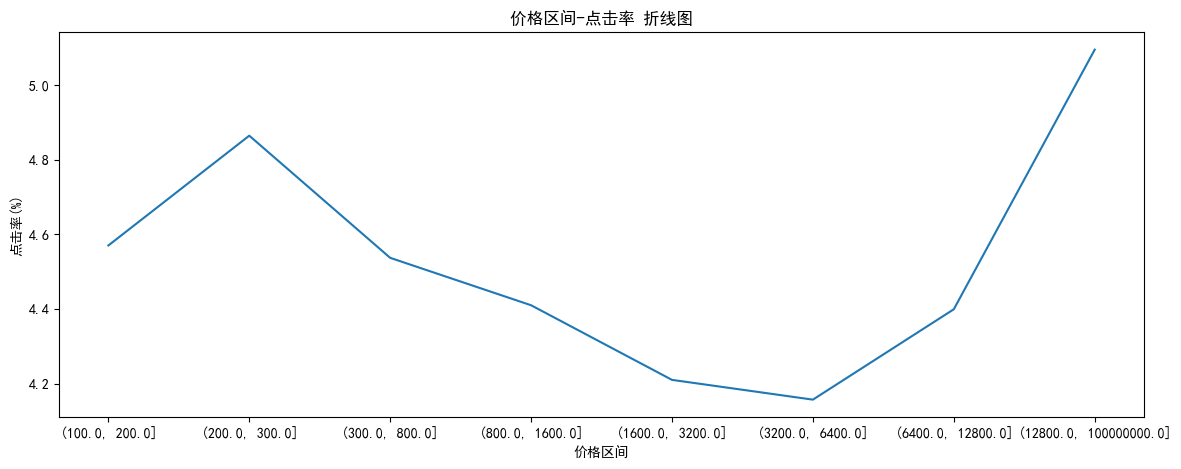

In [4]:
plt.figure(figsize=(14,5))
plt.plot(df_clk['price_range'], df_clk['clk_ratio']*100)
plt.xlabel('价格区间')
plt.ylabel('点击率(%)')
plt.title('价格区间-点击率 折线图')
plt.show()

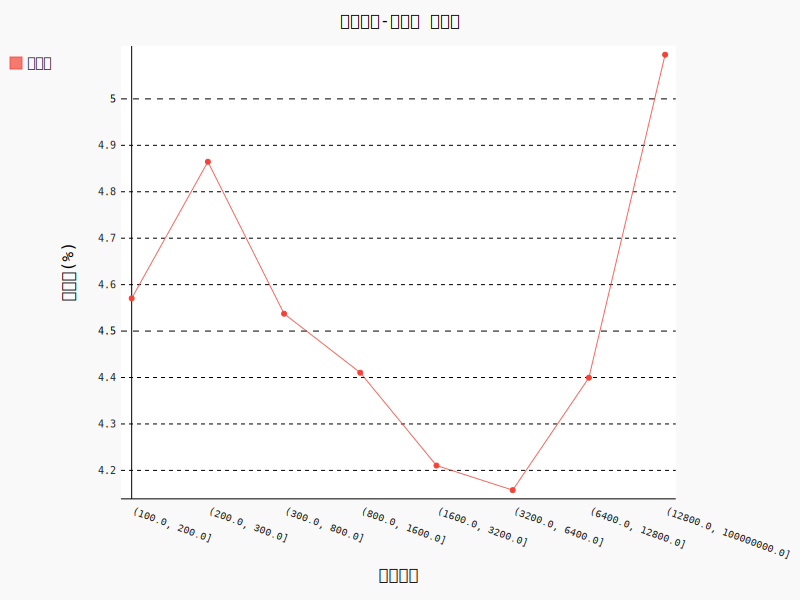

In [5]:
line_chart = pygal.Line(x_label_rotation=20)
line_chart.title = '价格区间-点击率 折线图'
line_chart.x_title = '价格区间'
line_chart.y_title = '点击率(%)'
line_chart.x_labels = map(str, df_clk['price_range'])
line_chart.add('点击率',df_clk['clk_ratio']*100)
display(SVG(line_chart.render(disable_xml_declaration=True)))
line_chart.render_to_file('价格区间-点击率 折线图.svg')

## 价格区间-用户图表

In [6]:
df = data[['购物层级','price_range','price_labels']]
df1 = pd.get_dummies(df['购物层级'],prefix='购物层级') 
df = pd.concat([df,df1],axis=1)
df

,购物层级,price_range,price_labels,购物层级_1,购物层级_2,购物层级_3
0,3,"(1600.0, 3200.0]",4,0,0,1
1,3,"(1600.0, 3200.0]",4,0,0,1
2,3,"(1600.0, 3200.0]",4,0,0,1
3,3,"(1600.0, 3200.0]",4,0,0,1
4,3,"(1600.0, 3200.0]",4,0,0,1
...,...,...,...,...,...,...
576667,3,"(300.0, 800.0]",2,0,0,1
576668,3,"(1600.0, 3200.0]",4,0,0,1
576669,3,"(100.0, 200.0]",0,0,0,1
576670,1,"(100.0, 200.0]",0,1,0,0


In [7]:
df_shopping_level = df.groupby(by=['price_labels','price_range'], as_index=False)[['购物层级_1','购物层级_2','购物层级_3']].sum()
df_shopping_level['total'] = df_shopping_level['购物层级_1'] + df_shopping_level['购物层级_2'] + df_shopping_level['购物层级_3']
df_shopping_level['购物层级_1_ratio'] = df_shopping_level['购物层级_1']/df_shopping_level['total']
df_shopping_level['购物层级_2_ratio'] = df_shopping_level['购物层级_2']/df_shopping_level['total']
df_shopping_level['购物层级_3_ratio'] = df_shopping_level['购物层级_3']/df_shopping_level['total']
labels_range = df_shopping_level[['price_labels', 'price_range']]
df_shopping_level

,price_labels,price_range,购物层级_1,购物层级_2,购物层级_3,total,购物层级_1_ratio,购物层级_2_ratio,购物层级_3_ratio
0,0,"(100.0, 200.0]",9242.0,21245.0,149822.0,180309.0,0.051256,0.117826,0.830918
1,1,"(200.0, 300.0]",5431.0,12306.0,84141.0,101878.0,0.053309,0.120792,0.825900
2,2,"(300.0, 800.0]",7967.0,17348.0,131406.0,156721.0,0.050836,0.110694,0.838471
3,3,"(800.0, 1600.0]",2629.0,5894.0,46552.0,55075.0,0.047735,0.107018,0.845247
4,4,"(1600.0, 3200.0]",1653.0,3677.0,30391.0,35721.0,0.046275,0.102937,0.850788
5,5,"(3200.0, 6400.0]",1062.0,2499.0,22681.0,26242.0,0.040469,0.095229,0.864302
6,6,"(6400.0, 12800.0]",468.0,1214.0,12842.0,14524.0,0.032223,0.083586,0.884192
7,7,"(12800.0, 100000000.0]",234.0,590.0,5378.0,6202.0,0.037730,0.095131,0.867140


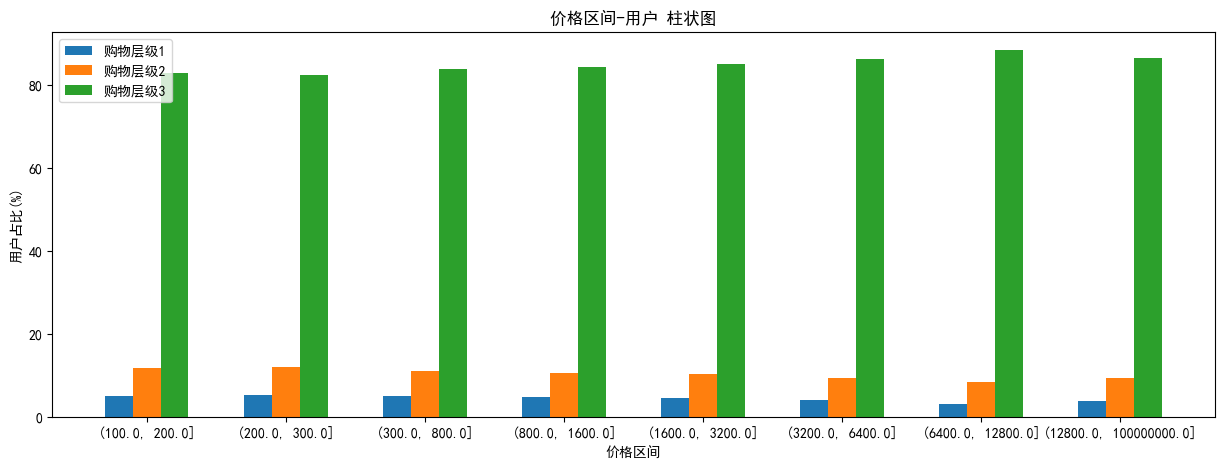

In [8]:
plt.figure(figsize=(15,5))
x_axis = np.arange(len(df_shopping_level['price_range']))
plt.bar(x_axis-0.2, df_shopping_level['购物层级_1_ratio']*100, width=0.2, label='购物层级1')
plt.bar(x_axis, df_shopping_level['购物层级_2_ratio']*100, width=0.2, label='购物层级2')
plt.bar(x_axis+0.2, df_shopping_level['购物层级_3_ratio']*100, width=0.2, label='购物层级3')
plt.xticks(x_axis,df_shopping_level['price_range'])
plt.legend(loc='upper left')
plt.xlabel('价格区间')
plt.ylabel('用户占比(%)')
plt.title('价格区间-用户 柱状图')
plt.show()

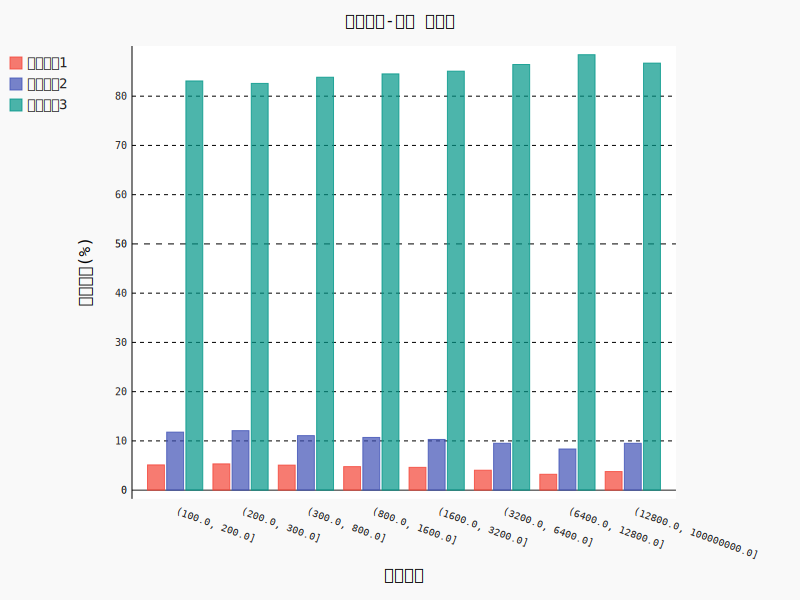

In [9]:
bar_chart = pygal.Bar(x_label_rotation=20)
bar_chart.title = '价格区间-用户 折线图'
bar_chart.x_title = '价格区间'
bar_chart.y_title = '用户占比(%)'
bar_chart.add('购物层级1', df_shopping_level['购物层级_1_ratio']*100)
bar_chart.add('购物层级2', df_shopping_level['购物层级_2_ratio']*100)
bar_chart.add('购物层级3', df_shopping_level['购物层级_3_ratio']*100)
bar_chart.x_labels = map(str, df_shopping_level['price_range'])
display(SVG(bar_chart.render(disable_xml_declaration=True)))
bar_chart.render_to_file('价格区间-用户 折线图.svg')

## top100广告位 每价格区间占比

In [10]:
df_ad = data.groupby(by=['ad_id'], as_index=False)['clk'].sum()
df_ad.sort_values('clk', ascending=False, inplace=True)
df_price = data.groupby(by=['ad_id'], as_index=False)['price'].mean()

In [11]:
df_ad_price = pd.merge(df_ad[:100], df_price, how='left', on='ad_id')
df_ad_price['price_range'] = pd.cut(x = df_ad_price['price'], bins = [100,200,300,800,1600,3200,6400,12800,max(data['price'])]).astype(str)
df_ad_price = df_ad_price.merge(labels_range, how='left', on='price_range')
df_ad_price

,ad_id,clk,price,price_range,price_labels
0,118317,346,198.0,"(100.0, 200.0]",0
1,112657,141,498.0,"(300.0, 800.0]",2
2,149707,112,138.0,"(100.0, 200.0]",0
3,125418,97,138.0,"(100.0, 200.0]",0
4,127564,85,338.0,"(300.0, 800.0]",2
...,...,...,...,...,...
95,173618,26,218.0,"(200.0, 300.0]",1
96,21623,26,598.0,"(300.0, 800.0]",2
97,120730,25,196.0,"(100.0, 200.0]",0
98,114732,25,168.0,"(100.0, 200.0]",0


In [12]:
df_ad_price_group = df_ad_price.groupby(by=['price_labels', 'price_range'], as_index=False)['ad_id'].count()
df_ad_price_group['ratio'] = df_ad_price_group['ad_id']/df_ad_price_group['ad_id'].sum()
df_ad_price_group

,price_labels,price_range,ad_id,ratio
0,0,"(100.0, 200.0]",30,0.30
1,1,"(200.0, 300.0]",23,0.23
2,2,"(300.0, 800.0]",26,0.26
3,3,"(800.0, 1600.0]",10,0.10
4,4,"(1600.0, 3200.0]",5,0.05
5,5,"(3200.0, 6400.0]",3,0.03
6,6,"(6400.0, 12800.0]",3,0.03


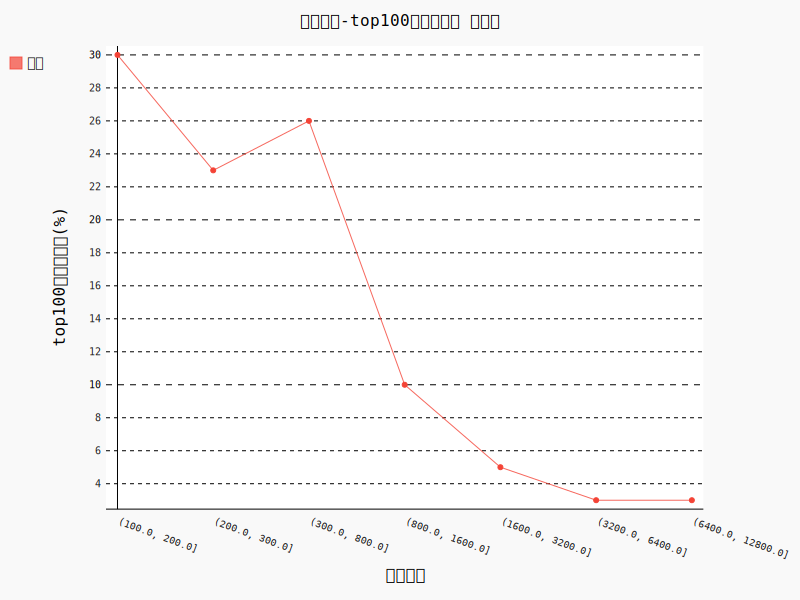

In [26]:
line_chart = pygal.Line(x_label_rotation=20)
line_chart.title = '价格区间-top100广告位占比 折线图'
line_chart.x_title = '价格区间'
line_chart.y_title = 'top100广告位占比(%)'
line_chart.x_labels = map(str, df_ad_price_group['price_range'])
line_chart.add('占比',df_ad_price_group['ratio']*100)
display(SVG(line_chart.render(disable_xml_declaration=True)))
line_chart.render_to_file('价格区间-top100广告位占比 折线图.svg')

## top10 tail10

In [14]:
top10 = df_ad_price[:10]['ad_id']
tail10 = df_ad_price[90:]['ad_id']
Top10 = data[data['ad_id'].isin(list(top10))]
Tail10 = data[data['ad_id'].isin(list(tail10))]
Top10 = Top10[['ad_id', '性别', '年龄层级', '购物层级', 'nonclk', 'clk', 'price']]
Tail10 = Tail10[['ad_id', '性别', '年龄层级', '购物层级', 'nonclk', 'clk', 'price']]
Top10['cat'] = 'top10'
Tail10['cat'] = 'tail10'
df_20 = pd.concat([Top10,Tail10], axis=0)
df_20

,ad_id,性别,年龄层级,购物层级,nonclk,clk,price,cat
2296,136644,2,2,3,1,0,259.0,top10
2297,136644,2,3,3,1,0,259.0,top10
2298,136644,2,5,3,1,0,259.0,top10
2299,136644,2,5,3,1,0,259.0,top10
2300,136644,2,5,1,1,0,259.0,top10
...,...,...,...,...,...,...,...,...
375420,147706,1,3,3,1,0,358.0,tail10
375421,147706,1,5,2,1,0,358.0,tail10
375422,147706,1,5,3,0,1,358.0,tail10
375423,147706,2,4,3,1,0,358.0,tail10


In [15]:
df1 = pd.get_dummies(df_20['性别'],prefix='性别')
df2 = pd.get_dummies(df_20['年龄层级'],prefix='年龄层级')
df3 = pd.get_dummies(df_20['购物层级'],prefix='购物层级')
df_20 = pd.concat([df_20, df1, df2, df3], axis=1)
df_20

,ad_id,性别,年龄层级,购物层级,nonclk,clk,price,cat,性别_1,性别_2,年龄层级_0,年龄层级_1,年龄层级_2,年龄层级_3,年龄层级_4,年龄层级_5,年龄层级_6,购物层级_1,购物层级_2,购物层级_3
2296,136644,2,2,3,1,0,259.0,top10,0,1,0,0,1,0,0,0,0,0,0,1
2297,136644,2,3,3,1,0,259.0,top10,0,1,0,0,0,1,0,0,0,0,0,1
2298,136644,2,5,3,1,0,259.0,top10,0,1,0,0,0,0,0,1,0,0,0,1
2299,136644,2,5,3,1,0,259.0,top10,0,1,0,0,0,0,0,1,0,0,0,1
2300,136644,2,5,1,1,0,259.0,top10,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375420,147706,1,3,3,1,0,358.0,tail10,1,0,0,0,0,1,0,0,0,0,0,1
375421,147706,1,5,2,1,0,358.0,tail10,1,0,0,0,0,0,0,1,0,0,1,0
375422,147706,1,5,3,0,1,358.0,tail10,1,0,0,0,0,0,0,1,0,0,0,1
375423,147706,2,4,3,1,0,358.0,tail10,0,1,0,0,0,0,1,0,0,0,0,1


In [16]:
sex_group = df_20.groupby(by=['ad_id','cat'], sort=False, as_index=False)[['性别_1', '性别_2']].sum()
age_group = df_20.groupby(by=['ad_id','cat'], sort=False, as_index=False)[['年龄层级_0', '年龄层级_1', '年龄层级_2', '年龄层级_3', \
                                                                             '年龄层级_4', '年龄层级_5', '年龄层级_6']].sum()
level_group = df_20.groupby(by=['ad_id','cat'], sort=False, as_index=False)[['购物层级_1', '购物层级_2', '购物层级_3']].sum()
combine = pd.merge(sex_group, age_group, how='left', on=['ad_id','cat'])
combine = pd.merge(combine, level_group, how='left', on=['ad_id','cat'])
combine['total'] = combine['性别_1'] + combine['性别_2']
combine

,ad_id,cat,性别_1,性别_2,年龄层级_0,年龄层级_1,年龄层级_2,年龄层级_3,年龄层级_4,年龄层级_5,年龄层级_6,购物层级_1,购物层级_2,购物层级_3,total
0,136644,top10,194.0,745.0,0.0,3.0,64.0,220.0,368.0,270.0,14.0,63.0,131.0,745.0,939.0
1,139759,top10,299.0,942.0,0.0,72.0,314.0,449.0,295.0,107.0,4.0,88.0,172.0,981.0,1241.0
2,174186,top10,1090.0,322.0,1.0,20.0,88.0,299.0,425.0,533.0,46.0,78.0,185.0,1149.0,1412.0
3,118317,top10,2233.0,1205.0,2.0,494.0,917.0,886.0,537.0,563.0,39.0,225.0,514.0,2699.0,3438.0
4,112657,top10,243.0,1263.0,1.0,70.0,308.0,498.0,416.0,208.0,5.0,38.0,121.0,1347.0,1506.0
5,133509,top10,182.0,950.0,0.0,4.0,79.0,418.0,459.0,156.0,16.0,40.0,81.0,1011.0,1132.0
6,167968,top10,219.0,920.0,0.0,1.0,41.0,342.0,498.0,250.0,7.0,67.0,176.0,896.0,1139.0
7,125418,top10,102.0,883.0,0.0,100.0,352.0,327.0,125.0,70.0,11.0,17.0,52.0,916.0,985.0
8,149707,top10,382.0,1603.0,0.0,31.0,242.0,999.0,597.0,108.0,8.0,74.0,217.0,1694.0,1985.0
9,127564,top10,274.0,1534.0,0.0,21.0,209.0,733.0,599.0,233.0,13.0,69.0,146.0,1593.0,1808.0


In [17]:
ratios = pd.DataFrame()
ratios['ad_id'] = combine['ad_id']
ratios['cat'] = combine['cat']
cols = combine.columns[2:-1]
for i in cols:
    ratios[f'{i}_ratio'] = combine[i]/combine['total']
ratios

,ad_id,cat,性别_1_ratio,性别_2_ratio,年龄层级_0_ratio,年龄层级_1_ratio,年龄层级_2_ratio,年龄层级_3_ratio,年龄层级_4_ratio,年龄层级_5_ratio,年龄层级_6_ratio,购物层级_1_ratio,购物层级_2_ratio,购物层级_3_ratio
0,136644,top10,0.206603,0.793397,0.000000,0.003195,0.068158,0.234292,0.391906,0.287540,0.014909,0.067093,0.139510,0.793397
1,139759,top10,0.240935,0.759065,0.000000,0.058018,0.253022,0.361805,0.237712,0.086221,0.003223,0.070911,0.138598,0.790492
2,174186,top10,0.771955,0.228045,0.000708,0.014164,0.062323,0.211756,0.300992,0.377479,0.032578,0.055241,0.131020,0.813739
3,118317,top10,0.649506,0.350494,0.000582,0.143688,0.266725,0.257708,0.156195,0.163758,0.011344,0.065445,0.149506,0.785049
4,112657,top10,0.161355,0.838645,0.000664,0.046481,0.204515,0.330677,0.276228,0.138114,0.003320,0.025232,0.080345,0.894422
5,133509,top10,0.160777,0.839223,0.000000,0.003534,0.069788,0.369258,0.405477,0.137809,0.014134,0.035336,0.071555,0.893110
6,167968,top10,0.192274,0.807726,0.000000,0.000878,0.035996,0.300263,0.437226,0.219491,0.006146,0.058824,0.154522,0.786655
7,125418,top10,0.103553,0.896447,0.000000,0.101523,0.357360,0.331980,0.126904,0.071066,0.011168,0.017259,0.052792,0.929949
8,149707,top10,0.192443,0.807557,0.000000,0.015617,0.121914,0.503275,0.300756,0.054408,0.004030,0.037280,0.109320,0.853401
9,127564,top10,0.151549,0.848451,0.000000,0.011615,0.115597,0.405420,0.331305,0.128872,0.007190,0.038164,0.080752,0.881084


## top10&tail10广告位 性别占比、年龄层级占比、购物层级占比

In [18]:
ratios['ad_id'] = pd.Categorical(list(top10.append(tail10)),ordered=True).astype(str)
df_top10 = ratios[ratios['cat']=='top10']
df_tail10 = ratios[ratios['cat']=='tail10']

C:\Users\hejin\AppData\Local\Temp\ipykernel_14172\1845939904.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratios['ad_id'] = pd.Categorical(list(top10.append(tail10)),ordered=True).astype(str)


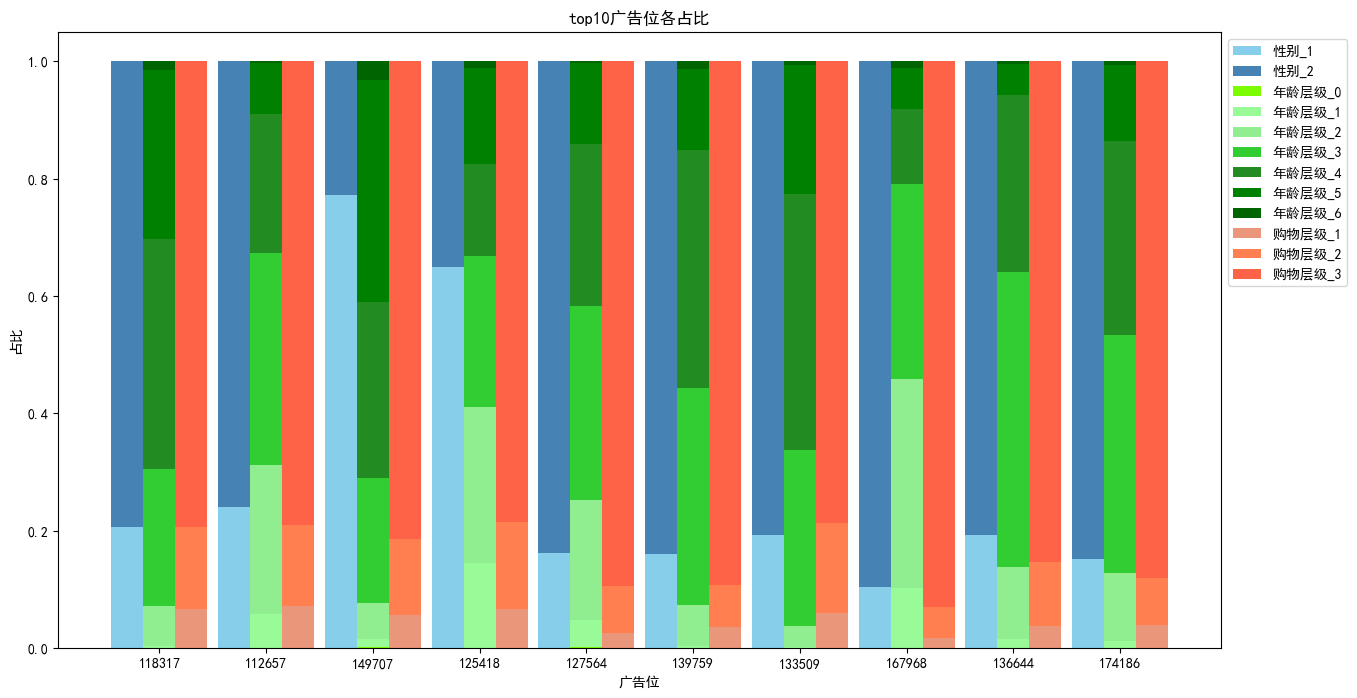

In [19]:
plt.figure(figsize=(15,8))
x_axis = np.arange(len(df_top10['ad_id']))
# 性别
plt.bar(x_axis - 0.3, df_top10['性别_1_ratio'], width = 0.3, label = '性别_1', color='skyblue')
plt.bar(x_axis - 0.3, df_top10['性别_2_ratio'], bottom = df_top10['性别_1_ratio'], width = 0.3, label = '性别_2', color='steelblue')
# 年龄层级
plt.bar(x_axis, df_top10['年龄层级_0_ratio'], width = 0.3, label = '年龄层级_0', color='lawngreen')
plt.bar(x_axis, df_top10['年龄层级_1_ratio'], bottom = df_top10['年龄层级_0_ratio'], width = 0.3, label = '年龄层级_1', color='palegreen')
plt.bar(x_axis, df_top10['年龄层级_2_ratio'], bottom = df_top10['年龄层级_0_ratio']+df_top10['年龄层级_1_ratio'],\
        width = 0.3, label = '年龄层级_2', color='lightgreen')
plt.bar(x_axis, df_top10['年龄层级_3_ratio'], bottom = df_top10['年龄层级_0_ratio']+df_top10['年龄层级_1_ratio']+\
        df_top10['年龄层级_2_ratio'], width = 0.3, label = '年龄层级_3', color='limegreen')
plt.bar(x_axis, df_top10['年龄层级_4_ratio'], bottom = df_top10['年龄层级_0_ratio']+df_top10['年龄层级_1_ratio']+\
        df_top10['年龄层级_2_ratio']+df_top10['年龄层级_3_ratio'], width = 0.3, label = '年龄层级_4', color='forestgreen')
plt.bar(x_axis, df_top10['年龄层级_5_ratio'], bottom = df_top10['年龄层级_0_ratio']+df_top10['年龄层级_1_ratio']+\
        df_top10['年龄层级_2_ratio']+df_top10['年龄层级_3_ratio']+df_top10['年龄层级_4_ratio'], width = 0.3, label = '年龄层级_5', \
        color='green')
plt.bar(x_axis, df_top10['年龄层级_6_ratio'], bottom = df_top10['年龄层级_0_ratio']+df_top10['年龄层级_1_ratio']+\
        df_top10['年龄层级_2_ratio']+df_top10['年龄层级_3_ratio']+df_top10['年龄层级_4_ratio']+df_top10['年龄层级_5_ratio'], \
        width = 0.3, label = '年龄层级_6', color='darkgreen')
# 购物层级
plt.bar(x_axis + 0.3, df_top10['购物层级_1_ratio'], width = 0.3, label = '购物层级_1', color='darksalmon')
plt.bar(x_axis + 0.3, df_top10['购物层级_2_ratio'], bottom = df_top10['购物层级_1_ratio'], width = 0.3, label = '购物层级_2', color='coral')
plt.bar(x_axis + 0.3, df_top10['购物层级_3_ratio'], bottom = df_top10['购物层级_1_ratio']+df_top10['购物层级_2_ratio'],\
        width = 0.3, label = '购物层级_3', color='tomato')

plt.xticks(x_axis, df_top10['ad_id'])
plt.xlabel('广告位')
plt.ylabel('占比')
plt.title('top10广告位各占比')
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('top10广告位各占比.png')
plt.show()

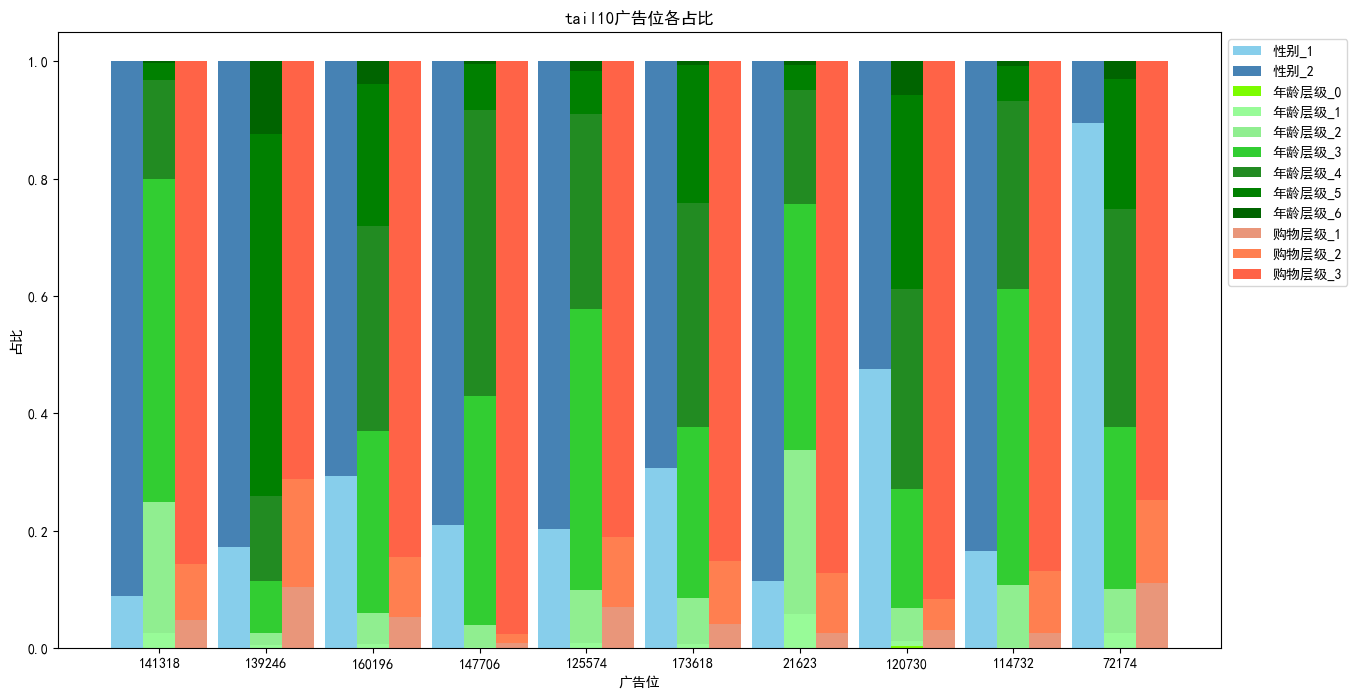

In [20]:
plt.figure(figsize=(15,8))
x_axis = np.arange(len(df_tail10['ad_id']))
# 性别
plt.bar(x_axis - 0.3, df_tail10['性别_1_ratio'], width = 0.3, label = '性别_1', color='skyblue')
plt.bar(x_axis - 0.3, df_tail10['性别_2_ratio'], bottom = df_tail10['性别_1_ratio'], width = 0.3, label = '性别_2', color='steelblue')
# 年龄层级
plt.bar(x_axis, df_tail10['年龄层级_0_ratio'], width = 0.3, label = '年龄层级_0', color='lawngreen')
plt.bar(x_axis, df_tail10['年龄层级_1_ratio'], bottom = df_tail10['年龄层级_0_ratio'], width = 0.3, label = '年龄层级_1', color='palegreen')
plt.bar(x_axis, df_tail10['年龄层级_2_ratio'], bottom = df_tail10['年龄层级_0_ratio']+df_tail10['年龄层级_1_ratio'],\
        width = 0.3, label = '年龄层级_2', color='lightgreen')
plt.bar(x_axis, df_tail10['年龄层级_3_ratio'], bottom = df_tail10['年龄层级_0_ratio']+df_tail10['年龄层级_1_ratio']+\
        df_tail10['年龄层级_2_ratio'], width = 0.3, label = '年龄层级_3', color='limegreen')
plt.bar(x_axis, df_tail10['年龄层级_4_ratio'], bottom = df_tail10['年龄层级_0_ratio']+df_tail10['年龄层级_1_ratio']+\
        df_tail10['年龄层级_2_ratio']+df_tail10['年龄层级_3_ratio'], width = 0.3, label = '年龄层级_4', color='forestgreen')
plt.bar(x_axis, df_tail10['年龄层级_5_ratio'], bottom = df_tail10['年龄层级_0_ratio']+df_tail10['年龄层级_1_ratio']+\
        df_tail10['年龄层级_2_ratio']+df_tail10['年龄层级_3_ratio']+df_tail10['年龄层级_4_ratio'], width = 0.3, label = '年龄层级_5', \
        color='green')
plt.bar(x_axis, df_tail10['年龄层级_6_ratio'], bottom = df_tail10['年龄层级_0_ratio']+df_tail10['年龄层级_1_ratio']+\
        df_tail10['年龄层级_2_ratio']+df_tail10['年龄层级_3_ratio']+df_tail10['年龄层级_4_ratio']+df_tail10['年龄层级_5_ratio'], \
        width = 0.3, label = '年龄层级_6', color='darkgreen')
# 购物层级
plt.bar(x_axis + 0.3, df_tail10['购物层级_1_ratio'], width = 0.3, label = '购物层级_1', color='darksalmon')
plt.bar(x_axis + 0.3, df_tail10['购物层级_2_ratio'], bottom = df_tail10['购物层级_1_ratio'], width = 0.3, label = '购物层级_2', color='coral')
plt.bar(x_axis + 0.3, df_tail10['购物层级_3_ratio'], bottom = df_tail10['购物层级_1_ratio']+df_tail10['购物层级_2_ratio'],\
        width = 0.3, label = '购物层级_3', color='tomato')

plt.xticks(x_axis, df_tail10['ad_id'])
plt.xlabel('广告位')
plt.ylabel('占比')
plt.title('tail10广告位各占比')
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('tail10广告位各占比.png')
plt.show()

Text(0.5, 1.0, 'Top90-100广告位性别占比')

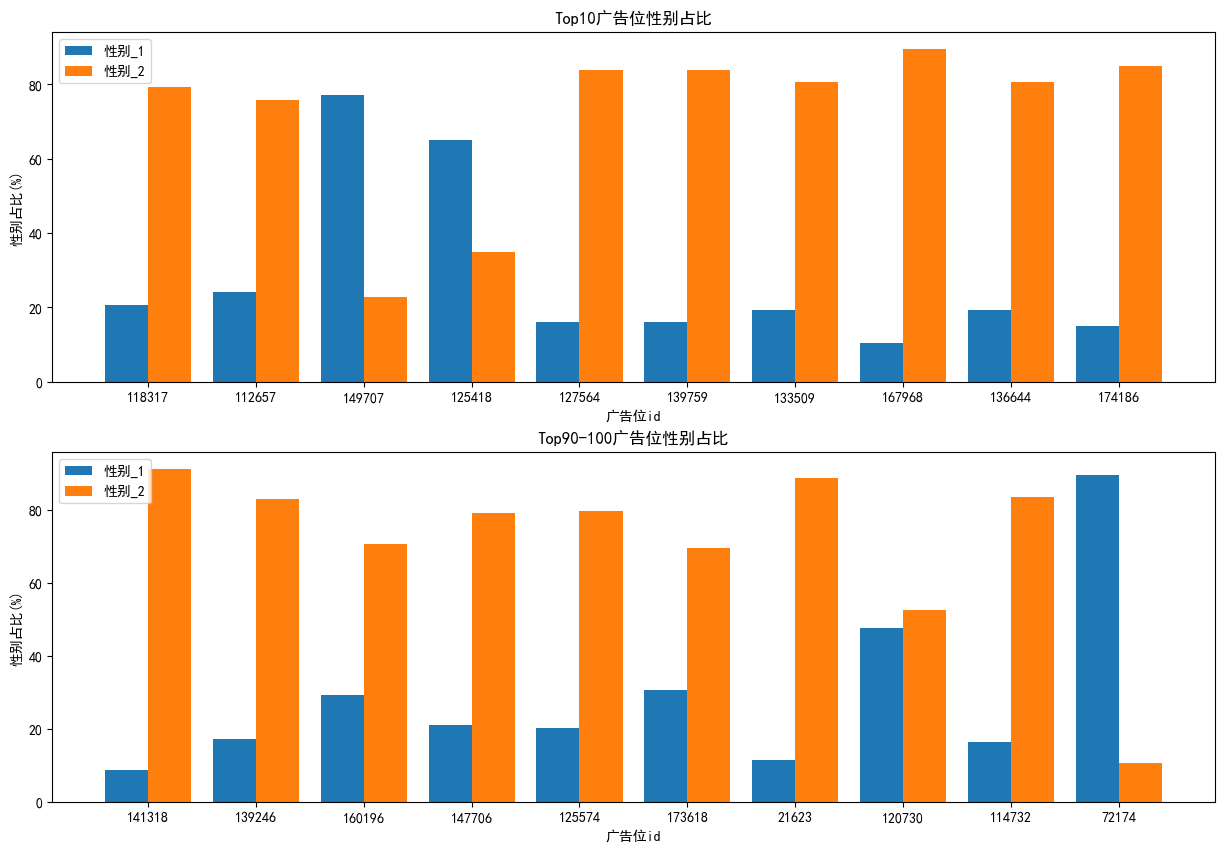

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

ax1 = axes[0]
ax2 = axes[1]

x_axis = np.arange(len(df_top10['ad_id']))
ax1.bar(x_axis-0.2, df_top10['性别_1_ratio']*100, width=0.4, label='性别_1')
ax1.bar(x_axis+0.2, df_top10['性别_2_ratio']*100, width=0.4, label='性别_2')
ax1.set_xticks(x_axis,df_top10['ad_id'])
ax1.legend(loc='upper left')
ax1.set_xlabel('广告位id')
ax1.set_ylabel('性别占比(%)')
ax1.set_title('Top10广告位性别占比')

x_axis = np.arange(len(df_tail10['ad_id']))
ax2.bar(x_axis-0.2, df_tail10['性别_1_ratio']*100, width=0.4, label='性别_1')
ax2.bar(x_axis+0.2, df_tail10['性别_2_ratio']*100, width=0.4, label='性别_2')
ax2.set_xticks(x_axis,df_tail10['ad_id'])
ax2.legend(loc='upper left')
ax2.set_xlabel('广告位id')
ax2.set_ylabel('性别占比(%)')
ax2.set_title('Top90-100广告位性别占比')

Text(0.5, 1.0, 'Top90-100广告位性别占比')

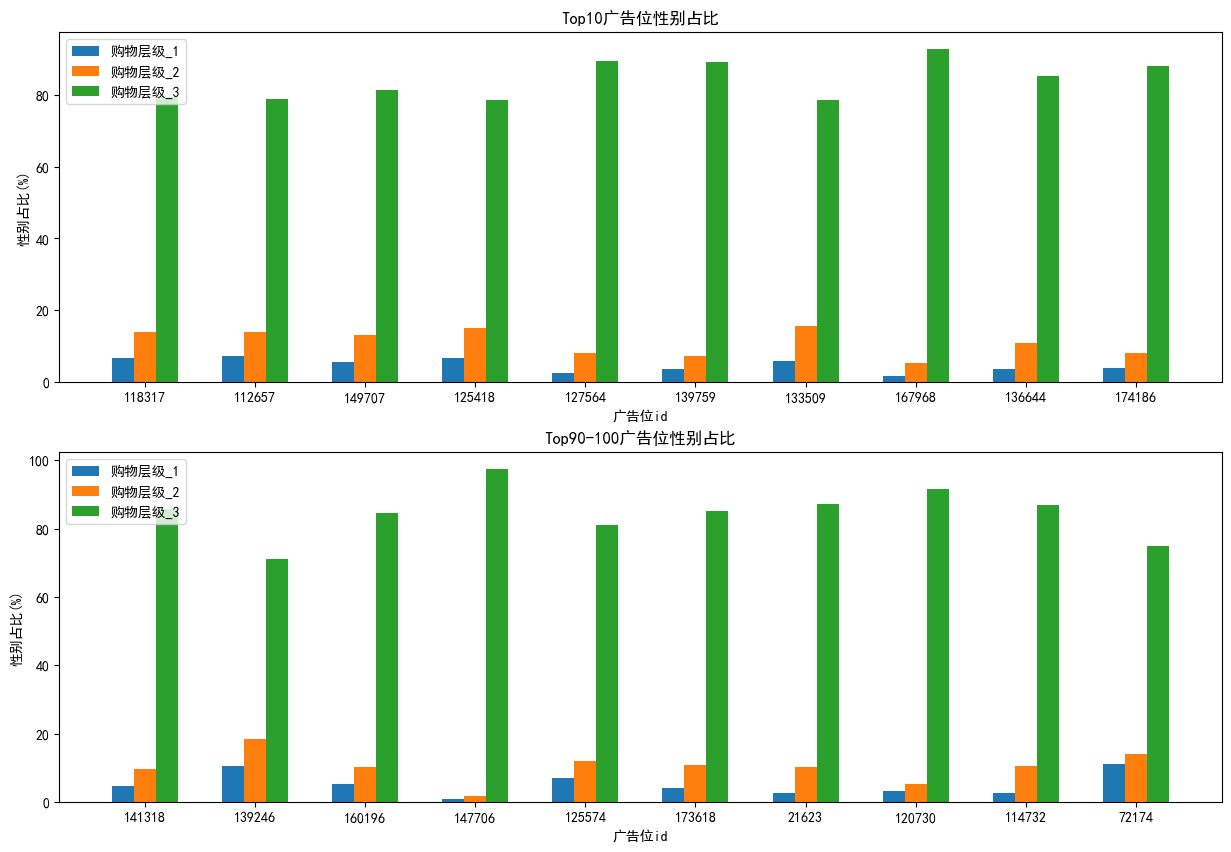

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

ax1 = axes[0]
ax2 = axes[1]

x_axis = np.arange(len(df_top10['ad_id']))
ax1.bar(x_axis-0.2, df_top10['购物层级_1_ratio']*100, width=0.2, label='购物层级_1')
ax1.bar(x_axis, df_top10['购物层级_2_ratio']*100, width=0.2, label='购物层级_2')
ax1.bar(x_axis+0.2, df_top10['购物层级_3_ratio']*100, width=0.2, label='购物层级_3')
ax1.set_xticks(x_axis,df_top10['ad_id'])
ax1.legend(loc='upper left')
ax1.set_xlabel('广告位id')
ax1.set_ylabel('性别占比(%)')
ax1.set_title('Top10广告位性别占比')

x_axis = np.arange(len(df_tail10['ad_id']))
ax2.bar(x_axis-0.2, df_tail10['购物层级_1_ratio']*100, width=0.2, label='购物层级_1')
ax2.bar(x_axis, df_tail10['购物层级_2_ratio']*100, width=0.2, label='购物层级_2')
ax2.bar(x_axis+0.2, df_tail10['购物层级_3_ratio']*100, width=0.2, label='购物层级_3')
ax2.set_xticks(x_axis,df_tail10['ad_id'])
ax2.legend(loc='upper left')
ax2.set_xlabel('广告位id')
ax2.set_ylabel('性别占比(%)')
ax2.set_title('Top90-100广告位性别占比')

## 被点击的商品的均价及未被点击的商品的均价

In [21]:
df = df_20.groupby(by=['ad_id','clk', 'cat'], sort=False, as_index=False)['price'].mean()
clk = pd.merge(df[df['clk']==0], df[df['clk']==1], on=['ad_id','cat'])
clk.drop(['clk_x','clk_y'], axis=1, inplace=True)
clk.columns = ['ad_id', 'cat','avg_price_nonclk', 'avg_price_clk']
clk

,ad_id,cat,avg_price_nonclk,avg_price_clk
0,136644,top10,259.0,259.0
1,139759,top10,481.0,481.0
2,174186,top10,122.0,122.0
3,118317,top10,198.0,198.0
4,112657,top10,498.0,498.0
5,133509,top10,266.0,266.0
6,167968,top10,298.0,298.0
7,125418,top10,138.0,138.0
8,149707,top10,138.0,138.0
9,127564,top10,338.0,338.0


In [22]:
(clk['avg_price_nonclk'] == clk['avg_price_clk']).unique() # 被点击的商品的均价及未被点击的商品的均价相同

array([ True])

In [23]:
clk['ad_id'] = pd.Categorical(list(top10.append(tail10)),ordered=True).astype(str)
clk_top10 = clk[clk['cat']=='top10']
clk_tail10 = clk[clk['cat']=='tail10']

C:\Users\hejin\AppData\Local\Temp\ipykernel_14172\3327237385.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clk['ad_id'] = pd.Categorical(list(top10.append(tail10)),ordered=True).astype(str)


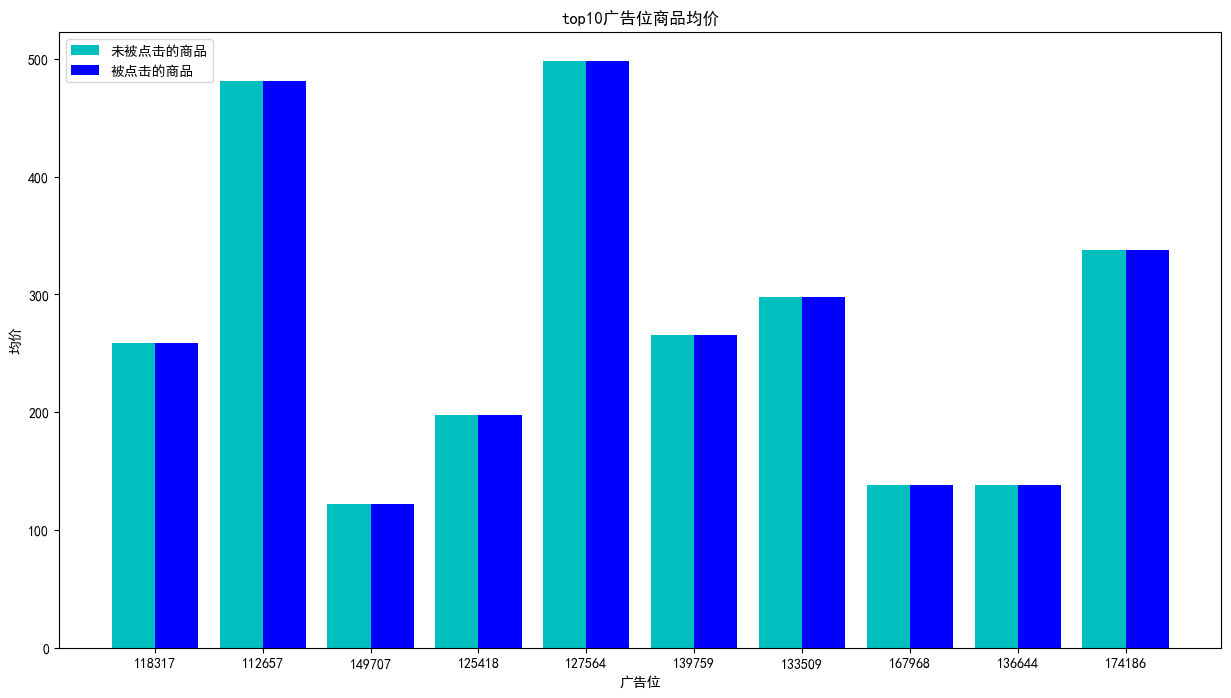

In [24]:
plt.figure(figsize=(15,8))
x_axis = np.arange(len(clk_top10['ad_id']))
plt.bar(x_axis-0.2, clk_top10['avg_price_nonclk'], width=0.4, label='未被点击的商品', color='c')
plt.bar(x_axis+0.2, clk_top10['avg_price_clk'], width=0.4, label='被点击的商品', color='b')
plt.xticks(x_axis, clk_top10['ad_id'])
plt.xlabel('广告位')
plt.ylabel('均价')
plt.title('top10广告位商品均价')
plt.legend(loc='upper left')
plt.savefig('top10广告位商品均价.png')
plt.show()

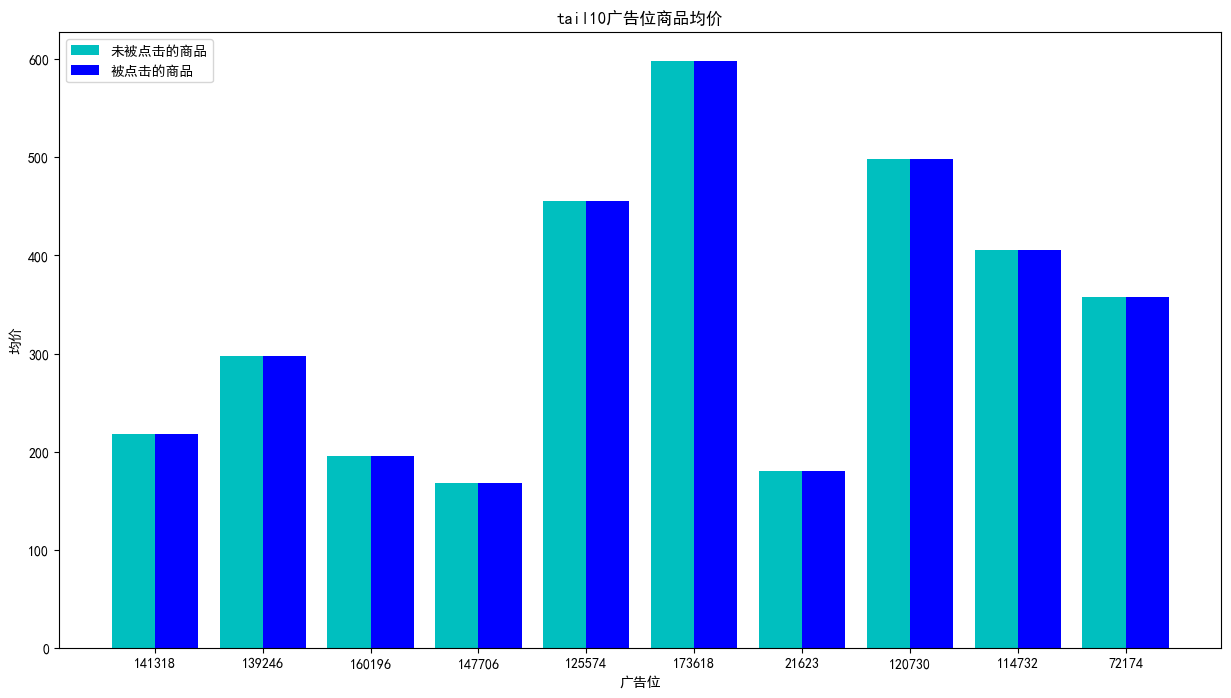

In [25]:
plt.figure(figsize=(15,8))
x_axis = np.arange(len(clk_tail10['ad_id']))
plt.bar(x_axis-0.2, clk_tail10['avg_price_nonclk'], width=0.4, label='未被点击的商品', color='c')
plt.bar(x_axis+0.2, clk_tail10['avg_price_clk'], width=0.4, label='被点击的商品', color='b')
plt.xticks(x_axis, clk_tail10['ad_id'])
plt.xlabel('广告位')
plt.ylabel('均价')
plt.title('tail10广告位商品均价')
plt.legend(loc='upper left')
plt.savefig('tail10广告位商品均价.png')
plt.show()